In [1]:
import os
import json
import wandb
import gymnasium as gym
from matplotlib import pyplot as plt
import seaborn as sns
from models.dueling_dql import DuelingDQL

In [ ]:
env = gym.make('LunarLander-v2', continuous=False, render_mode='rgb_array')
learning_rate = 1e-3
discount_factor = 0.99
exploration_rate = 1.0
episodes = 1000
max_steps = 1000

In [4]:
agent = DuelingDQL(env, learning_rate, discount_factor, exploration_rate)
history = agent.train(episodes, max_steps, log_wandb=True, update=True, save_episodes=True, save_interval=100)

[EP 1/1000] - Reward: -61.1582 - Steps: 67 - Eps: 0.0100 - Time: 2.81s
[EP 2/1000] - Reward: -545.1042 - Steps: 116 - Eps: 0.0100 - Time: 3.26s
[EP 3/1000] - Reward: -335.3770 - Steps: 324 - Eps: 0.0100 - Time: 9.05s
[EP 4/1000] - Reward: -472.8986 - Steps: 115 - Eps: 0.0100 - Time: 3.31s
[EP 5/1000] - Reward: -147.3898 - Steps: 156 - Eps: 0.0100 - Time: 4.45s
[EP 6/1000] - Reward: -455.2603 - Steps: 76 - Eps: 0.0100 - Time: 2.17s
[EP 7/1000] - Reward: -208.3863 - Steps: 143 - Eps: 0.0100 - Time: 4.03s
[EP 8/1000] - Reward: -132.1474 - Steps: 238 - Eps: 0.0100 - Time: 6.70s
[EP 9/1000] - Reward: -188.8093 - Steps: 234 - Eps: 0.0100 - Time: 6.61s
[EP 10/1000] - Reward: -199.3090 - Steps: 339 - Eps: 0.0100 - Time: 9.54s
[EP 11/1000] - Reward: -169.9914 - Steps: 534 - Eps: 0.0100 - Time: 15.16s
[EP 12/1000] - Reward: -401.2338 - Steps: 882 - Eps: 0.0100 - Time: 24.86s
[EP 13/1000] - Reward: -42.1594 - Steps: 530 - Eps: 0.0100 - Time: 14.93s
[EP 14/1000] - Reward: -355.5482 - Steps: 850 - 

In [ ]:
# save history
if not os.path.exists('./history'):
        os.mkdir('./history')

with open('./history/dueling_dql_history.json', 'w') as file:
    json.dump(history, file)

## Evaluation

In [2]:
with open('history\dueling_dql_history.json', 'r') as file:
    history = json.load(file)

rewards, avg_rewards, steps = history['reward'], history['avg_reward_100'], history['steps']

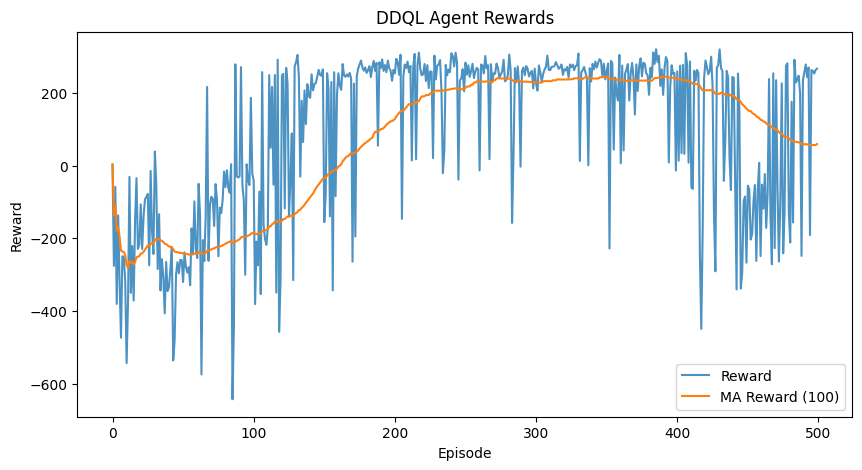

In [3]:
plt.figure(figsize=(10, 5))

plt.plot(rewards, alpha=0.8, label='Reward')
plt.plot(avg_rewards, label='MA Reward (100)')

plt.title('DDQL Agent Rewards')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.legend()

plt.show()

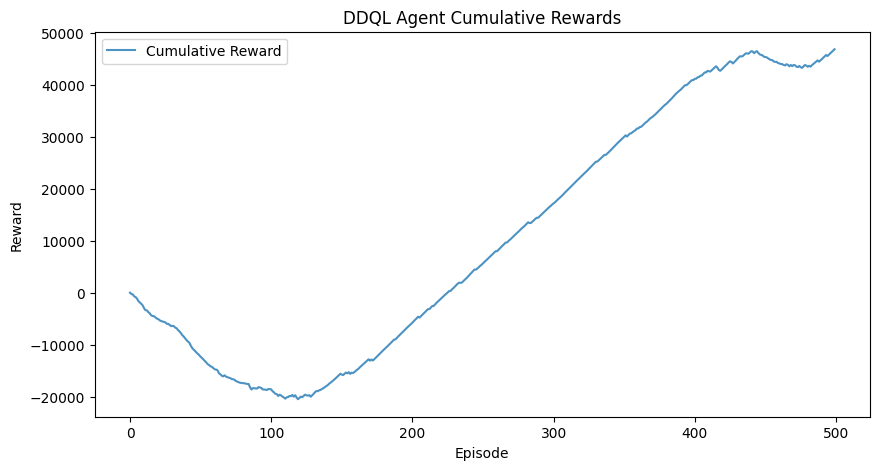

In [4]:
# plot cumulative reward
cumulative_reward = [sum(rewards[:i+1]) for i in range(len(rewards))]
plt.figure(figsize=(10, 5))

plt.plot(cumulative_reward, alpha=0.8, label='Cumulative Reward')

plt.title('DDQL Agent Cumulative Rewards')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.legend()
plt.show()

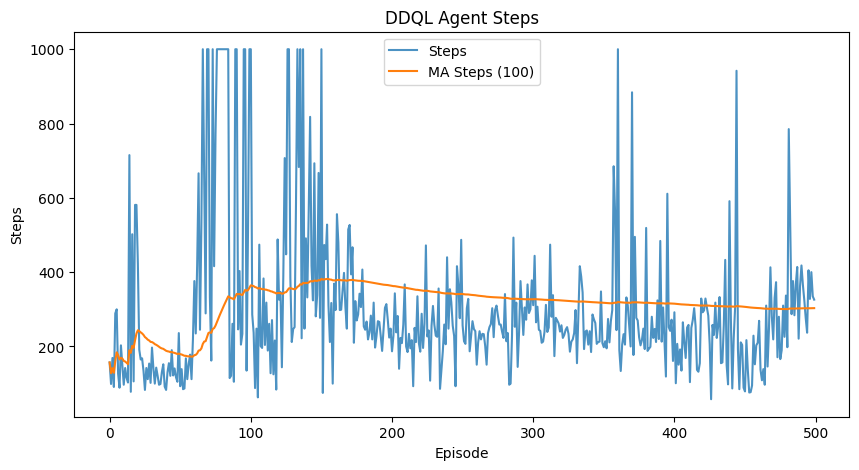

In [5]:
# plot steps and moving average steps
avg_steps = [sum(steps[:i+1])/(i+1) for i in range(len(steps))]
plt.figure(figsize=(10, 5))

plt.plot(steps, alpha=0.8, label='Steps')
plt.plot(avg_steps, label='MA Steps (100)')

plt.title('DDQL Agent Steps')
plt.xlabel('Episode')
plt.ylabel('Steps')
plt.legend()
plt.show()